### Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Inserting the data

In [2]:
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25],[4.50], [5.50]])

y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

print(X[0].shape)
print(X.T * y)
print(y.shape)

(1,)
[[0.   0.   0.   0.   0.   0.   3.   0.   1.75 0.   5.   0.   2.25 0.
  2.75 3.5  4.   4.25 4.5  5.5 ]]
(20,)


## Graphing the data

C:\Users\hkiro\AppData\Local\conda\conda\envs\ski\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

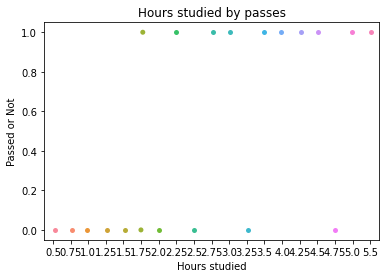

In [3]:
x_axis = 'Hours studied'
y_axis = 'Passed or Not'

graph = sns.stripplot(X[:,0], y)
graph.set(xlabel = x_axis, ylabel = y_axis)

plt.title('Hours studied by passes')

plt.show

## Weights and bias initialisation

In [4]:
def initial_theta_bias(features):
    '''This function creates the inital weights at 1 and the initalial bias at nothing'''
    theta = np.zeros(features.shape[1]) #Creating tuples to store the wieghts and bias
    bias = 0 #Setting bias to zeros
    return theta,bias

In [5]:
#Test Delete later
print(X[0].shape)
a,b = initial_theta_bias(X)

print(a,b)

(1,)
[0.] 0


## Sigmoid Equation

### $\frac{1}{1 + e^{-z}}$

In [6]:
def sigmoid(data):
    '''Calculates the sigmoid of a np array'''
    return 1/(1+np.exp(-data)) # Just return the sigmoid

In [7]:
#Test Delete later
test_x = np.array([0.25,0.75])
test_y = np.array([0,1])
print(sigmoid(test_x))

[0.5621765 0.6791787]


In [8]:
def cost_func(hyp,y,num_sample):
    y_transposed = y.T
    '''This calculates the cost function for logistic regression and nothing else'''
    return (-1/num_sample) * (np.sum((y_transposed * np.log(hyp)) + ((1 - y_transposed) * (np.log(1 - hyp)))))

## Cost Function

In [9]:
def update(theta,bias,x,y):
    '''This is the update method which is worked out by firstly comming up with the hypothisis for the current model
    then works out the difference and the calculates the derivative of the difference and the bias'''
    num_samples = x.shape[0]
    

    hypothisis = sigmoid(np.dot(theta,x.T) + bias)
    

    cost = cost_func(hypothisis,y,num_samples)
    
    
    derivative_theta = (1/num_samples) * (np.dot(x.T, (hypothisis - y.T).T))
    derivative_bias = (1/num_samples) * (np.sum(hypothisis - y.T))                      
    
    return cost, derivative_theta, derivative_bias

## Main part

In [10]:
def main(theta, bias, x, y , learning_rate, iterations):
    
    costs = []
    
    for i in range(iterations):
        cost, dw, db = update(theta,bias, x,y)
        
        theta = theta - (learning_rate * (dw.T))
        bias = bias - (learning_rate * db.T)
        
        if(i % 100 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
        
    return theta, bias, costs
        

In [11]:
w, b = initial_theta_bias(X)

In [12]:
w,b,costs = main(w,b,X,y,0.001,1000)



Cost after 0 iteration is 0.693147
Cost after 100 iteration is 0.678424
Cost after 200 iteration is 0.669222
Cost after 300 iteration is 0.663230
Cost after 400 iteration is 0.659116
Cost after 500 iteration is 0.656112
Cost after 600 iteration is 0.653770
Cost after 700 iteration is 0.651829
Cost after 800 iteration is 0.650134
Cost after 900 iteration is 0.648594
